# Iris Classification — EDA & Modeling

Exploring the Iris dataset with visualization and building simple classifiers.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
iris = load_iris(as_frame=True)
df = iris.frame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
print(df.info())
print(df.describe())
df['target'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

target
0    50
1    50
2    50
Name: count, dtype: int64

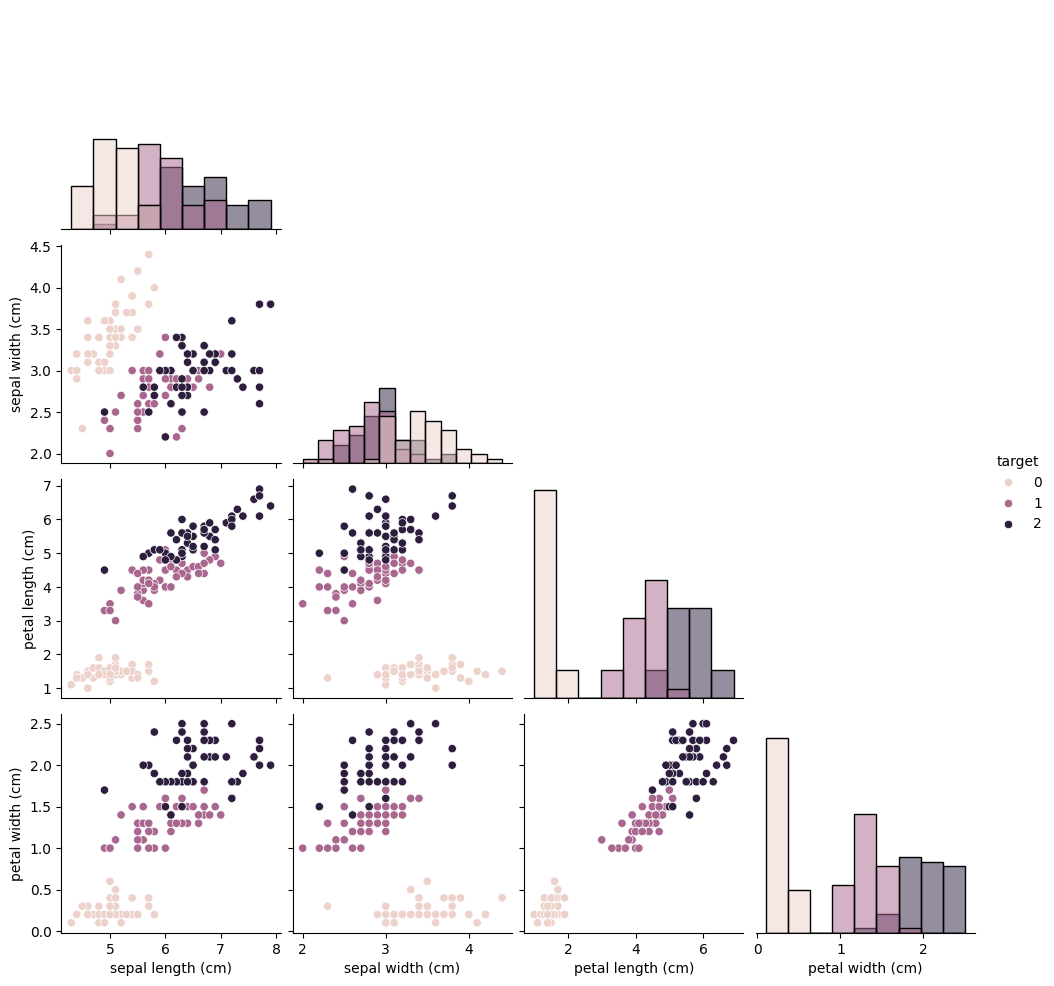

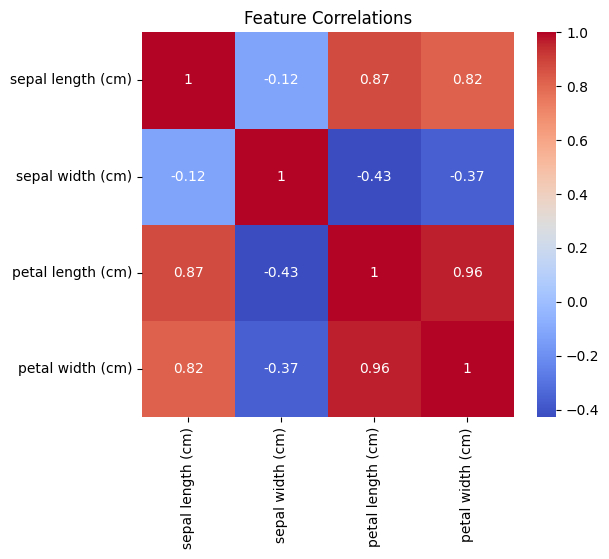

In [5]:
sns.pairplot(df, hue="target", corner=True, diag_kind="hist")
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


In [6]:
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



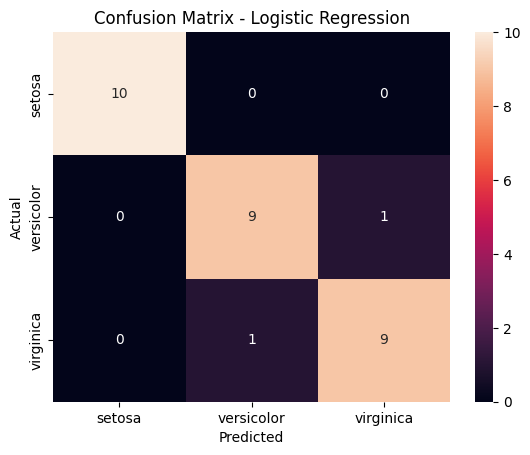

In [7]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [8]:
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, mdl in models.items():
    scores = cross_val_score(mdl, X_train_scaled, y_train, cv=5, scoring="accuracy")
    print(f"{name}: CV accuracy = {np.mean(scores):.3f} ± {np.std(scores):.3f}")


KNN: CV accuracy = 0.967 ± 0.031
DecisionTree: CV accuracy = 0.942 ± 0.020
RandomForest: CV accuracy = 0.950 ± 0.017
SVM: CV accuracy = 0.967 ± 0.031


## Conclusion

- The dataset is small and balanced.
- Logistic Regression already performs well.
- Random Forest and SVM achieve very high accuracy (>95%).
- Next step: Move training code into `src/train.py` and deploy with Streamlit.
